In [2]:
import numpy as np

# Ruta a tu archivo
npz = np.load("DataProcessed/Mel/audio_4-1_mel.npz")

# Mostrar las keys disponibles
print("Keys del archivo:", npz.files)


Keys del archivo: ['mel_spec']


In [6]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())
  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

def detect_mouth(detection_result, MOUTH_LANDMARKS = [0, 37, 267, 39, 40, 41, 185, 61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291]):
  for face_landmarks in detection_result.face_landmarks:
      mouth_coords = [(landmark.x, landmark.y, landmark.z) for i, landmark in enumerate(face_landmarks) if i in MOUTH_LANDMARKS]
      
      print("Mouth Coordinates:")
      for idx, (x, y, z) in enumerate(mouth_coords):
          print(f"Landmark {MOUTH_LANDMARKS[idx]}: x={x:.4f}, y={y:.4f}, z={z:.4f}")

def extract_mouth(image, detection_result, MOUTH_LANDMARKS = [0, 37, 267, 39, 40, 41, 185, 61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291]):
    for face_landmarks in detection_result.face_landmarks:
        # Get mouth coordinates in pixel format
        img_height, img_width, _ = image.shape
        mouth_coords = [(int(landmark.x * img_width), int(landmark.y * img_height)) 
                        for i, landmark in enumerate(face_landmarks) if i in MOUTH_LANDMARKS]
        
        # Find bounding box of the mouth
        x_min = min([x for x, y in mouth_coords])
        x_max = max([x for x, y in mouth_coords])
        y_min = min([y for x, y in mouth_coords])
        y_max = max([y for x, y in mouth_coords])
        
        # Expand the bounding box slightly (optional)
        padding = 10  # Adjust if needed
        x_min = max(x_min - padding, 0)
        x_max = min(x_max + padding, img_width)
        y_min = max(y_min - padding, 0)
        y_max = min(y_max + padding, img_height)

        # Crop the mouth region
        mouth_region = image[y_min:y_max, x_min:x_max]

        return mouth_region


Video shape: (63, 640, 360, 3)


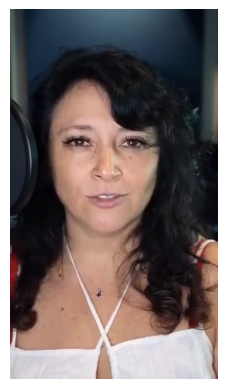

I0000 00:00:1738829941.170304   19378 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1738829941.173249   45362 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1738829941.174767   19378 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738829941.189899   45364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738829941.231708   45366 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.4713858962059021, y=0.4977058172225952, z=-0.056780099868774414, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4719516634941101, y=0.45440351963043213, z=-0.12542660534381866, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4709938168525696, y=0.4662321209907532, z=-0.06097375601530075, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4492284655570984, y=0.4091208279132843, z=-0.10228686034679413, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.47148042917251587, y=0.4411366283893585, z=-0.13563476502895355, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.470309317111969, y=0.42282378673553467, z=-0.12910103797912598, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.46781182289123535, y=0.3767479658126831, z=-0.07365787774324417, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2956541180610657, y=0.3669126033782959, z=0.012444131076335907, visibility=0.0, presence=0.0), NormalizedLand

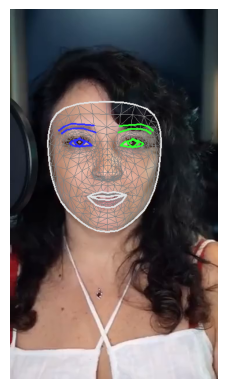

Mouth Coordinates:
Landmark 0: x=0.4714, y=0.4977, z=-0.0568
Landmark 37: x=0.4699, y=0.5370, z=-0.0264
Landmark 267: x=0.4438, y=0.4953, z=-0.0548
Landmark 39: x=0.4174, y=0.4983, z=-0.0410
Landmark 40: x=0.3989, y=0.5012, z=-0.0231
Landmark 41: x=0.4243, y=0.5043, z=-0.0329
Landmark 185: x=0.3739, y=0.5066, z=0.0182
Landmark 61: x=0.4407, y=0.5356, z=-0.0258
Landmark 146: x=0.3957, y=0.5218, z=-0.0073
Landmark 91: x=0.3832, y=0.5140, z=0.0072
Landmark 181: x=0.4151, y=0.5302, z=-0.0179
Landmark 84: x=0.3848, y=0.5039, z=-0.0028
Landmark 17: x=0.4982, y=0.4946, z=-0.0531
Landmark 314: x=0.5587, y=0.5028, z=0.0255
Landmark 405: x=0.4985, y=0.5345, z=-0.0239
Landmark 321: x=0.5395, y=0.5188, z=-0.0021
Landmark 375: x=0.5510, y=0.5102, z=0.0134
Landmark 291: x=0.5220, y=0.5279, z=-0.0139


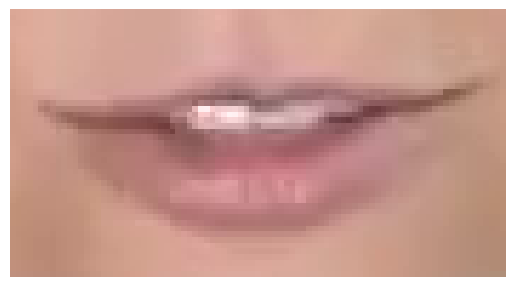

In [7]:
import skvideo.io
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from PIL import Image
import cv2

# Load the video and extract the first frame
videogen = skvideo.io.vread('./Data/video2/clip_2-41.mp4')
print(f"Video shape: {videogen.shape}")  # (num_frames, height, width, channels)

# Convert first frame to an Image
first_frame = videogen[0]  # First frame (NumPy array)
first_frame = first_frame.astype(np.uint8)

# Convert to RGB (if needed, as skvideo loads in RGB format)
# OpenCV loads BGR, but skvideo loads RGB by default, so no need to convert

# Create an mp.Image from the frame
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=first_frame)

# Display the frame
plt.imshow(mp_image.numpy_view())  
plt.axis('off')
plt.show()

# Set up FaceLandmarker
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=False,  # Activate for a 3D model only
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# Run the detector on the extracted frame
results = detector.detect(mp_image)

# Print face landmark results
print(results)

annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), results)
# Display the frame
plt.imshow(annotated_image)  
plt.axis('off')
plt.show()

detect_mouth(results)

mouth = extract_mouth(mp_image.numpy_view(), results)
plt.imshow(mouth)  
plt.axis('off')
plt.show()


In [3]:
import os
import yt_dlp
import re

def sanitize_filename(filename):
    """Replace special characters in the filename with underscores."""
    sanitized = re.sub(r'[^\w\s]', '_', filename)  # Replace non-alphanumeric characters
    sanitized = sanitized.replace(' ', '_')       # Replace spaces with underscores
    return sanitized

def DownloadVideo(url, platform, save_path):
    if isinstance(url, str):
        result = {"file_path": None, "title": None, "duration": None}
        if platform == 'yt':  # YouTube platform
            try:
                # Extract video information without downloading first to sanitize title
                ydl_opts_info = {
                    'quiet': True,
                    'skip_download': True,  # Only fetch metadata
                }
                with yt_dlp.YoutubeDL(ydl_opts_info) as ydl:
                    info = ydl.extract_info(url, download=False)
                    original_title = info['title']
                    sanitized_title = sanitize_filename(original_title)

                # Use sanitized title in download options
                ydl_opts = {
                    'outtmpl': f'{save_path}/{sanitized_title}.mp4',  # Sanitized title
                    'format': 'mp4',
                    'quiet': True,
                }
                with yt_dlp.YoutubeDL(ydl_opts) as ydl:
                    ydl.download([url])

                sanitized_file_path = f"{save_path}/{sanitized_title}.mp4"
                result["file_path"] = sanitized_file_path
                result["title"] = sanitized_title
                result["duration"] = info.get('duration')
                return result

            except Exception as e:
                print(f"An error occurred with yt-dlp: {e}")
                #print("Falling back to pytubefix...")

                # Fallback to pytubefix
                try:
                    from pytubefix import YouTube
                    from pytubefix.cli import on_progress
                    yt = YouTube(url, on_progress_callback=on_progress)
                    video_stream = yt.streams.get_highest_resolution()
                    original_title = yt.title
                    sanitized_title = sanitize_filename(original_title)
                    
                    file_path = video_stream.download(output_path=save_path)
                    
                    # Rename the file with sanitized title
                    sanitized_file_path = f"{save_path}/{sanitized_title}.mp4"
                    if os.path.exists(file_path):
                        os.rename(file_path, sanitized_file_path)

                    result["file_path"] = sanitized_file_path
                    result["title"] = sanitized_title
                    result["duration"] = yt.length
                    return result
                except Exception as fallback_error:
                    print(f"An error occurred with pytubefix: {fallback_error}")
                    return None
        else:  # TikTok or other platforms
            try:
                # Similar logic as YouTube
                ydl_opts_info = {
                    'quiet': True,
                    'skip_download': True,
                }
                with yt_dlp.YoutubeDL(ydl_opts_info) as ydl:
                    info = ydl.extract_info(url, download=False)
                    original_title = info['title']
                    sanitized_title = sanitize_filename(original_title)

                ydl_opts = {
                    'outtmpl': f'{save_path}/{sanitized_title}.mp4',
                    'format': 'mp4',
                    'quiet': True,
                }
                with yt_dlp.YoutubeDL(ydl_opts) as ydl:
                    ydl.download([url])

                sanitized_file_path = f"{save_path}/{sanitized_title}.mp4"
                result["file_path"] = sanitized_file_path
                result["title"] = sanitized_title
                result["duration"] = info.get('duration')
                return result
            except Exception as e:
                print(f"An error occurred with TikTok video: {e}")
                return None
    else:
        print("URL is not valid, must be a string.")
        return None

In [16]:
DownloadVideo('https://youtu.be/rWlY7JiMXHs?si=UvHu246Lifb87ERt', 'yt', './Data/video10')

{'file_path': './Data/video10/Presidenta_de_Perú_cambia_discurso_sobre_la_relación_diplomática_con_México___Ciro_Gómez_Leyva.mp4',
 'title': 'Presidenta_de_Perú_cambia_discurso_sobre_la_relación_diplomática_con_México___Ciro_Gómez_Leyva',
 'duration': 28}

In [19]:
import whisper
import json
import os
import ffmpeg
import subprocess

# -------- CONFIGURATION --------
VIDEO_PATH = "./Data/video10/Presidenta_de_Perú_cambia_discurso_sobre_la_relación_diplomática_con_México___Ciro_Gómez_Leyva.mp4"
AUDIO_PATH = "audio.wav"
OUTPUT_FOLDER = "word_clips"
TRANSCRIPT_FILE = "transcript.txt"
ALIGNMENT_JSON = "alignment.json"

# Ensure output folder exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------- STEP 1: Extract Audio from Video (16kHz WAV) --------
print("🎵 Extrayendo y convirtiendo audio a WAV 16kHz...")
(
    ffmpeg
    .input(VIDEO_PATH)
    .output(AUDIO_PATH, format="wav", acodec="pcm_s16le", ar="16000", ac=1)
    .run(overwrite_output=True, quiet=True)
)

if not os.path.exists(AUDIO_PATH) or os.path.getsize(AUDIO_PATH) == 0:
    raise ValueError("❌ Error: El archivo de audio no se generó correctamente.")

print(f"✅ Audio extraído: {AUDIO_PATH} ({os.path.getsize(AUDIO_PATH)} bytes)")

# -------- STEP 2: Transcribe Audio with Whisper (Spanish) --------
print("🔍 Transcribiendo audio con Whisper (Español)...")

model = whisper.load_model("base")
result = model.transcribe(AUDIO_PATH, language="es")

transcript = "\n".join([seg["text"] for seg in result["segments"]])

# -------- STEP 2.1: Modify Transcript for Word-Level Alignment --------
words = transcript.replace(",", "").replace(".", "").split()
word_transcript = "\n".join(words)

with open(TRANSCRIPT_FILE, "w", encoding="utf-8") as f:
    f.write(word_transcript)

print("✅ Transcripción modificada para alineación palabra por palabra.")

# -------- STEP 3: Align Text with Aeneas (Word Level) --------
print("🔄 Alineando texto con Aeneas...")

audio_path_fixed = os.path.abspath(AUDIO_PATH)
text_path_fixed = os.path.abspath(TRANSCRIPT_FILE)
json_path_fixed = os.path.abspath(ALIGNMENT_JSON)

cmd = [
    "python", "-m", "aeneas.tools.execute_task",
    audio_path_fixed,
    text_path_fixed,
    "task_language=spa|is_text_type=plain|os_task_file_format=json|os_task_file_level=word|os_task_file_sample_rate=16000|os_task_file_audio_format=wav",
    json_path_fixed
]

print("🚀 Ejecutando Aeneas con CLI...")
try:
    subprocess.run(cmd, check=True)
except subprocess.CalledProcessError as e:
    raise RuntimeError(f"❌ Error al ejecutar Aeneas: {e}")

if not os.path.exists(json_path_fixed):
    raise FileNotFoundError("❌ Error: Aeneas no generó el archivo de alineación.")

print("✅ Alineación completada. Tiempos guardados en", json_path_fixed)

# -------- STEP 4: Extract Word-Level Timestamps --------
print("📌 Extrayendo marcas de tiempo de palabras...")

with open(ALIGNMENT_JSON, "r", encoding="utf-8") as f:
    sync_map = json.load(f)

word_timestamps = []
for fragment in sync_map["fragments"]:
    word_timestamps.append({
        "word": fragment["lines"][0],
        "start": float(fragment["begin"]),
        "end": float(fragment["end"])
    })

# Print first 5 words with timestamps
for w in word_timestamps[:5]:
    print(w)

# -------- STEP 5: Validate Video Duration Before Cutting --------
print("📏 Verificando duración del video...")

try:
    probe = ffmpeg.probe(VIDEO_PATH)
    video_duration = float(probe["format"]["duration"])
    print(f"📏 Duración del video: {video_duration:.2f} segundos")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo obtener la duración del video: {e}")

# -------- STEP 6: Split Video by Words using FFmpeg (WITH AUDIO) --------
print("✂️ Dividiendo el video por palabras (con audio)...")

for i, word in enumerate(word_timestamps):
    start_time = word["start"]
    end_time = word["end"]
    word_text = word["word"].replace(" ", "_")  # Remove spaces from filenames
    output_path = os.path.join(OUTPUT_FOLDER, f"{i}_{word_text}.mp4")

    print(f"⏳ Procesando palabra: {word_text} | Inicio: {start_time:.2f}s | Fin: {end_time:.2f}s")

    if start_time < 0 or end_time <= start_time or end_time > video_duration:
        print(f"❌ Error: Tiempos inválidos para '{word_text}'. Saltando...")
        continue  # Skip invalid timestamps

    try:
        (
            ffmpeg
            .input(VIDEO_PATH, ss=start_time, to=end_time)
            .output(output_path, vcodec="libx264", acodec="aac", audio_bitrate="128k", strict="experimental")
            .run(overwrite_output=True, quiet=True)
        )
        print(f"🎬 Guardado: {output_path} con audio.")
    except ffmpeg.Error as e:
        print(f"❌ Error al procesar '{word_text}': {e}")

print("✅ Todas las palabras han sido segmentadas en clips de video con audio.")


🎵 Extrayendo y convirtiendo audio a WAV 16kHz...
✅ Audio extraído: audio.wav (880580 bytes)
🔍 Transcribiendo audio con Whisper (Español)...


/home/senorita-glez/envTT/lib/python3.10/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device

✅ Transcripción modificada para alineación palabra por palabra.
🔄 Alineando texto con Aeneas...
🚀 Ejecutando Aeneas con CLI...
[WARN] The default input encoding is not UTF-8.
[WARN] You might want to set 'PYTHONIOENCODING=UTF-8' in your shell.
[WARN] The default output encoding is not UTF-8.
[WARN] You might want to set 'PYTHONIOENCODING=UTF-8' in your shell.
[INFO] Validating config string (specify --skip-validator to bypass)...
[INFO] Validating config string... done
[INFO] Creating task...
[INFO] Creating task... done
[INFO] Executing task...
[INFO] Executing task... done
[INFO] Creating output sync map file...
[INFO] Creating output sync map file... done
[INFO] Created file '/home/senorita-glez/projects/TT/SpanishVisualSpeechRecognition/alignment.json'
✅ Alineación completada. Tiempos guardados en /home/senorita-glez/projects/TT/SpanishVisualSpeechRecognition/alignment.json
📌 Extrayendo marcas de tiempo de palabras...
{'word': 'Hoy', 'start': 0.0, 'end': 0.2}
{'word': 'la', 'start'

In [31]:
def get_subclip_paths(file_path, start, end):
    with open(json_file, "r", encoding="utf-8") as file:
        data = json.load(file)
    subclip_paths = [
        clip_path
        for video in data["videos"]
        for clip_path in video["video_metadata"]["subclips"].keys()
    ]
    return subclip_paths[start:end]

json_file = "./Data/videos_metadata.json"

list_of_videos = get_subclip_paths(json_file,0, 10)

In [32]:
print(f"Total number of subclips: {len(list_of_videos)}")
print(f"List of subclip paths: {list_of_videos}")

Total number of subclips: 10
List of subclip paths: ['./Data/video0/clip_0-1.mp4', './Data/video0/clip_0-2.mp4', './Data/video0/clip_0-3.mp4', './Data/video0/clip_0-4.mp4', './Data/video0/clip_0-5.mp4', './Data/video0/clip_0-6.mp4', './Data/video0/clip_0-7.mp4', './Data/video0/clip_0-8.mp4', './Data/video0/clip_0-9.mp4', './Data/video3/clip_3-1.mp4']


/tmp/ipykernel_281596/2803917999.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(archivo_audio, sr=None)
/home/senorita-glez/envTT/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


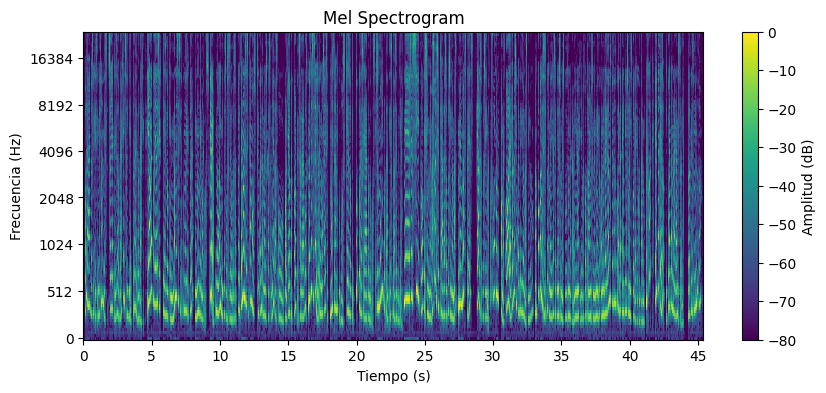

In [33]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Cargar el audio
archivo_audio = "./Data/video0/Que_NO_hacer_en_un_demo_de_voz___actrizdedoblaje__cristinahernandez__doblaje.mp4"  # Reemplázalo con tu archivo
y, sr = librosa.load(archivo_audio, sr=None)

# Convertir a espectrograma de Mel
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Graficar el espectrograma de Mel
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis="time", y_axis="mel", cmap="viridis")
plt.colorbar(label="Amplitud (dB)")
plt.title("Mel Spectrogram")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()


In [6]:
import os
import skvideo.io
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2


class VideoProcessor:
    def __init__(self, path):
        self.video_path = path
        self.frames = []
        self.mouth_frames = []
        self.face_frames = []

        base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
        self.detector = vision.FaceLandmarker.create_from_options(
            vision.FaceLandmarkerOptions(
                base_options=base_options,
                output_face_blendshapes=False,  
                output_facial_transformation_matrixes=True,
                num_faces=1
            )
        )

    def getFileName(self):
        return os.path.basename(self.video_path).split('.')[0]  # Nombre sin extensión

    def process_video(self):
        """Extrae los frames completos y las regiones de la boca y la cara en color."""
        self.frames.clear()
        self.mouth_frames.clear()
        self.face_frames.clear()
        
        videogen = skvideo.io.vreader(self.video_path)

        for frame in videogen:
            # Guardar el frame original en color
            self.frames.append(frame)

            # Detectar la cara en el frame
            detection_result = self.detect_face(frame)
            if detection_result is None:
                continue  

            # Extraer boca y cara en color
            mouth_crop = self.extract_mouth(frame, detection_result)
            face_crop = self.extract_face(frame, detection_result)

            if face_crop is not None:
                self.face_frames.append(face_crop)
            if mouth_crop is not None:
                self.mouth_frames.append(mouth_crop)

        return self.frames, self.mouth_frames, self.face_frames  

    def detect_face(self, frame):
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
        detection_result = self.detector.detect(mp_image)
        return detection_result if detection_result.face_landmarks else None

    def extract_face(self, image, detection_result, final_size=(100, 100)):
        """Extrae la región de la cara y la redimensiona en color."""
        for face_landmarks in detection_result.face_landmarks:
            img_height, img_width, _ = image.shape  # Mantener color

            x_min = int(min(landmark.x * img_width for landmark in face_landmarks))
            x_max = int(max(landmark.x * img_width for landmark in face_landmarks))
            y_min = int(min(landmark.y * img_height for landmark in face_landmarks))
            y_max = int(max(landmark.y * img_height for landmark in face_landmarks))

            if x_max <= x_min or y_max <= y_min:
                return None

            face_region = image[y_min:y_max, x_min:x_max]
            resized_face = cv2.resize(face_region, final_size, interpolation=cv2.INTER_AREA)
            return resized_face  

    def extract_mouth(self, image, detection_result, target_size=(100, 50), margin_factor=0.2):
        """Extrae la boca en color asegurando proporción 2:1."""
        MOUTH_LANDMARKS = [0, 37, 267, 39, 40, 41, 185, 61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291]

        for face_landmarks in detection_result.face_landmarks:
            img_height, img_width, _ = image.shape
            mouth_coords = [(int(landmark.x * img_width), int(landmark.y * img_height)) 
                            for i, landmark in enumerate(face_landmarks) if i in MOUTH_LANDMARKS]

            if not mouth_coords:
                return None  

            x_min, x_max = min(x for x, _ in mouth_coords), max(x for x, _ in mouth_coords)
            y_min, y_max = min(y for _, y in mouth_coords), max(y for _, y in mouth_coords)

            mouth_width, mouth_height = x_max - x_min, y_max - y_min
            margin_w = int(mouth_width * margin_factor)
            margin_h = int(mouth_height * margin_factor)

            x_min = max(x_min - margin_w, 0)
            x_max = min(x_max + margin_w, img_width)
            y_min = max(y_min - margin_h, 0)
            y_max = min(y_max + margin_h, img_height)

            mouth_width, mouth_height = x_max - x_min, y_max - y_min

            desired_width = max(mouth_width, 2 * mouth_height)
            desired_height = desired_width // 2  

            center_x, center_y = (x_max + x_min) // 2, (y_max + y_min) // 2

            x_min_new = max(center_x - desired_width // 2, 0)
            x_max_new = min(center_x + desired_width // 2, img_width)
            y_min_new = max(center_y - desired_height // 2, 0)
            y_max_new = min(center_y + desired_height // 2, img_height)

            mouth_region = image[y_min_new:y_max_new, x_min_new:x_max_new]
            resized_mouth = cv2.resize(mouth_region, target_size, interpolation=cv2.INTER_AREA)

            return resized_mouth

    def save_frames_as_images(self, frames, folder, prefix):
        """Guarda los frames en una carpeta como imágenes PNG en color."""
        if not frames:
            print(f"No hay frames disponibles para guardar en {folder}.")
            return

        os.makedirs(folder, exist_ok=True)

        for i, frame in enumerate(frames):
            filename = os.path.join(folder, f"{prefix}_{i:04d}.png")
            cv2.imwrite(filename, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Convertir de RGB a BGR

        print(f"Imágenes guardadas en {folder}")

    def save_video_frames(self, output_folder="video_frames"):
        """Guarda los frames completos del video en imágenes PNG en color."""
        self.save_frames_as_images(self.frames, output_folder, "frame")

    def save_mouth_images(self, output_folder="mouth_images"):
        """Guarda los frames de la boca como imágenes PNG en color."""
        self.save_frames_as_images(self.mouth_frames, output_folder, "mouth")

    def save_face_images(self, output_folder="face_images"):
        """Guarda los frames de la cara como imágenes PNG en color."""
        self.save_frames_as_images(self.face_frames, output_folder, "face")


if __name__ == "__main__":
    video_processor = VideoProcessor('./Data/video5/clip_5-7.mp4')
    
    frames, mouths, faces = video_processor.process_video()
    
    if frames:
        video_processor.save_video_frames("output_frames")
    if mouths:
        video_processor.save_mouth_images("output_mouths")
    if faces:
        video_processor.save_face_images("output_faces")


I0000 00:00:1740118856.893882    6984 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1740118856.895517   26562 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1740118856.896455    6984 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1740118856.911825   26565 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740118856.967346   26566 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Imágenes guardadas en output_frames
Imágenes guardadas en output_mouths
Imágenes guardadas en output_faces


Archivo: clip_5-37_face.npz, Dimensiones: (270, 100, 100)


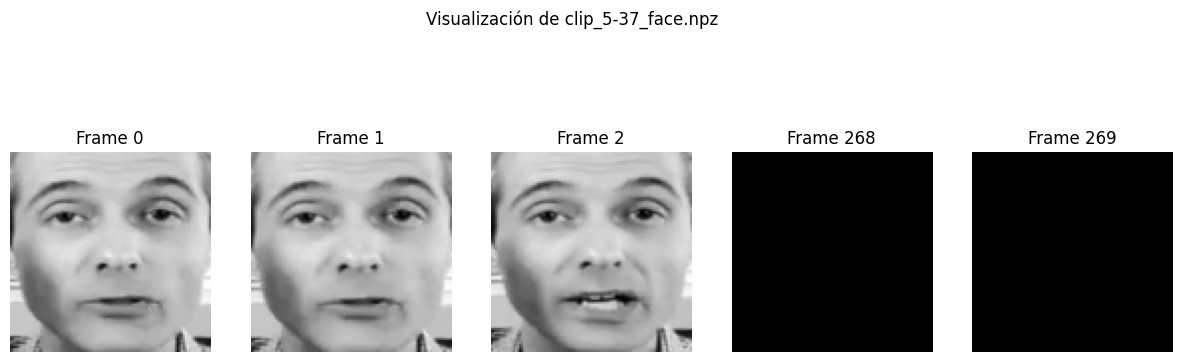

Archivo: clip_5-38_face.npz, Dimensiones: (270, 100, 100)


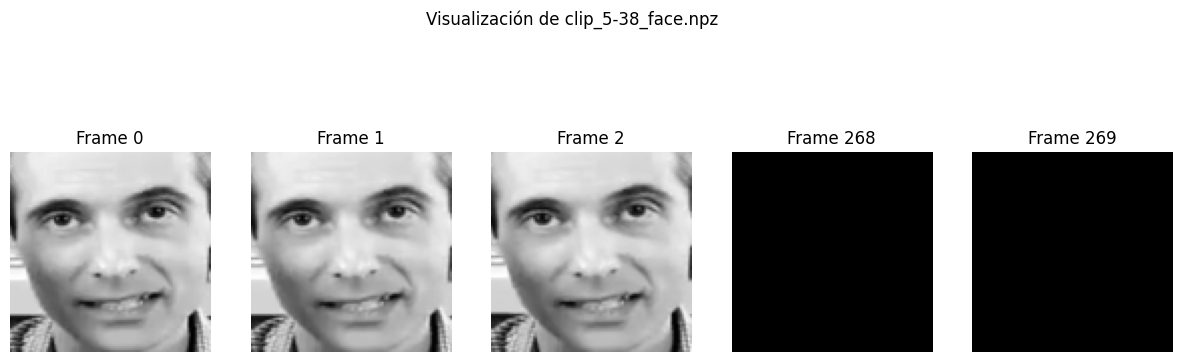

Archivo: clip_4-4_face.npz, Dimensiones: (270, 100, 100)


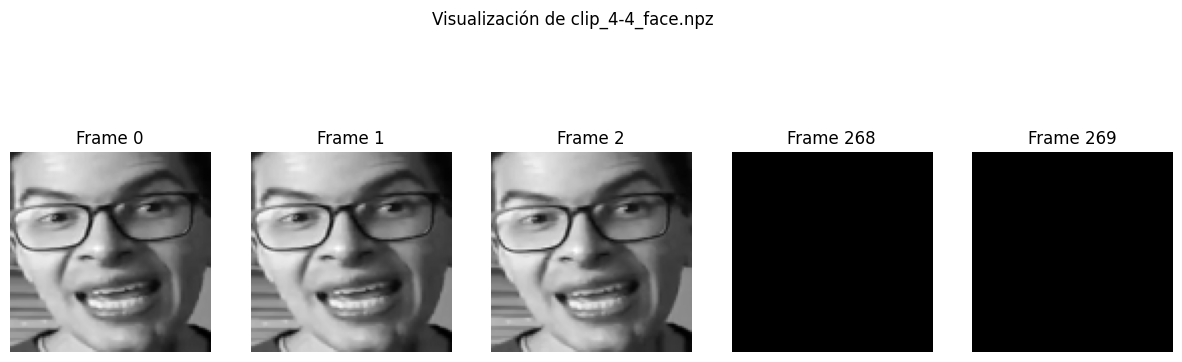

Archivo: clip_4-2_face.npz, Dimensiones: (270, 100, 100)


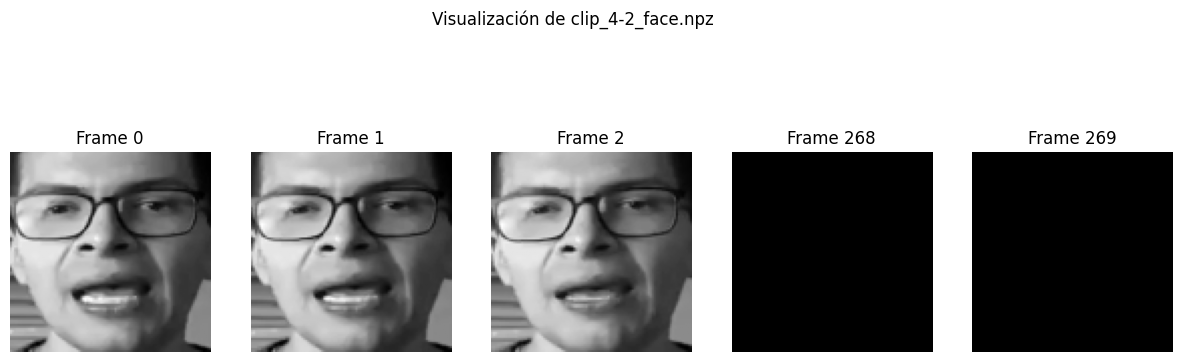

Archivo: clip_4-5_face.npz, Dimensiones: (270, 100, 100)


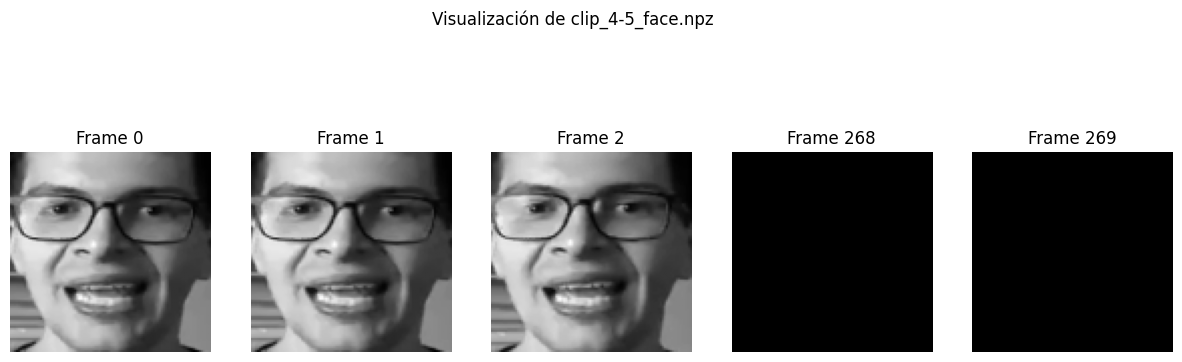

Archivo: clip_5-20_face.npz, Dimensiones: (270, 100, 100)


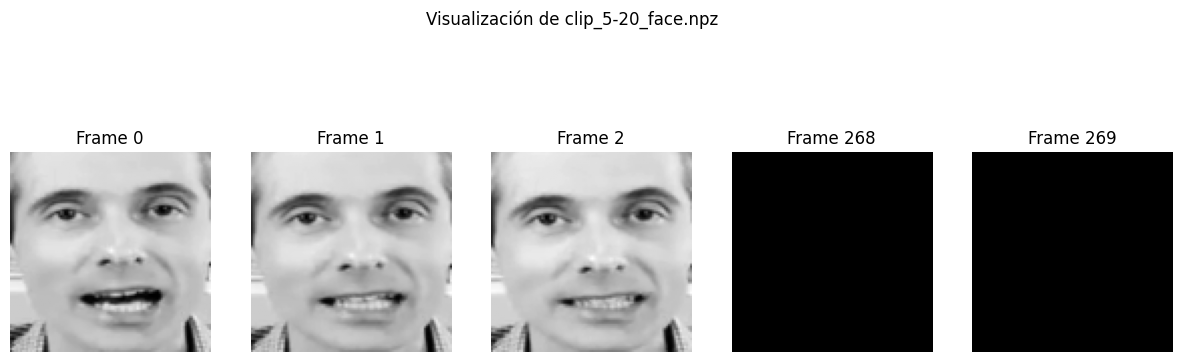

Archivo: clip_5-25_face.npz, Dimensiones: (270, 100, 100)


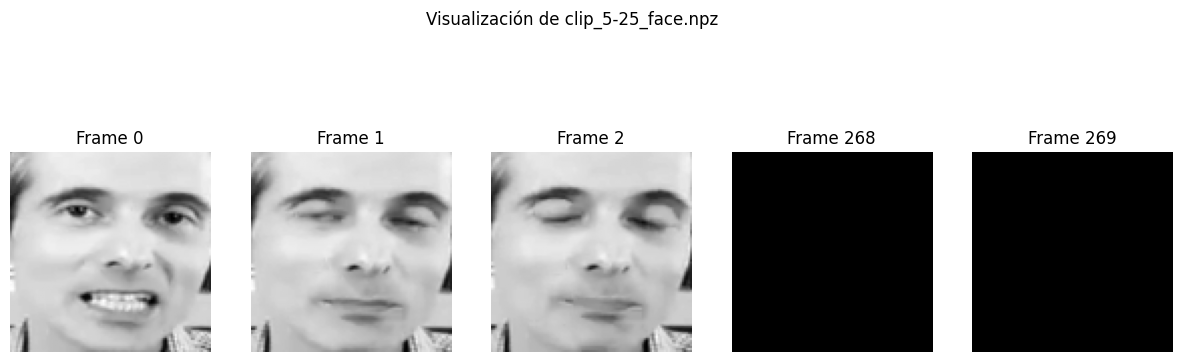

Archivo: clip_4-1_face.npz, Dimensiones: (270, 100, 100)


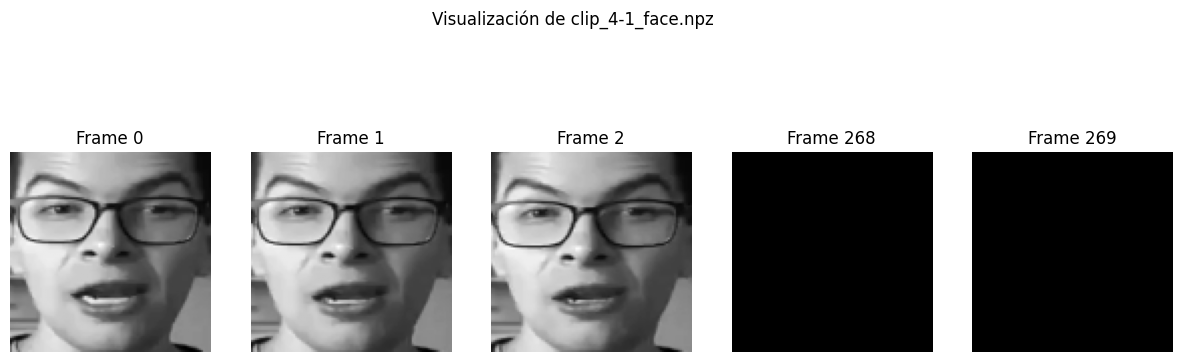

Archivo: clip_5-13_face.npz, Dimensiones: (270, 100, 100)


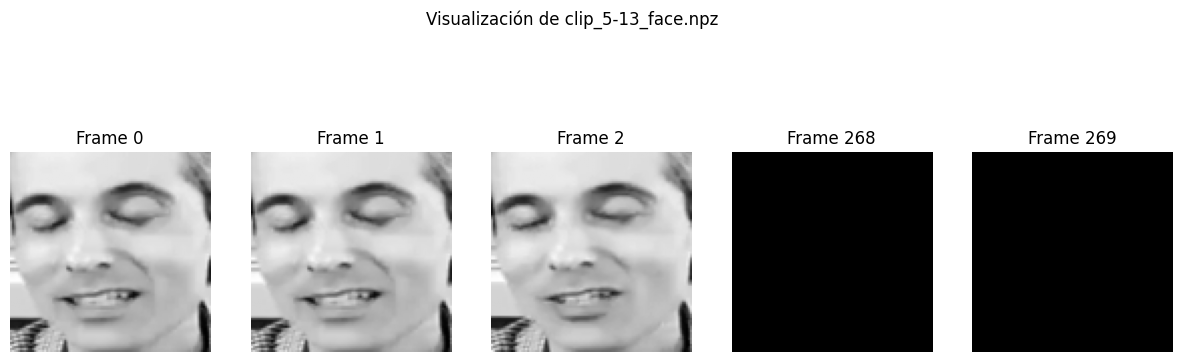

Archivo: clip_5-32_face.npz, Dimensiones: (270, 100, 100)


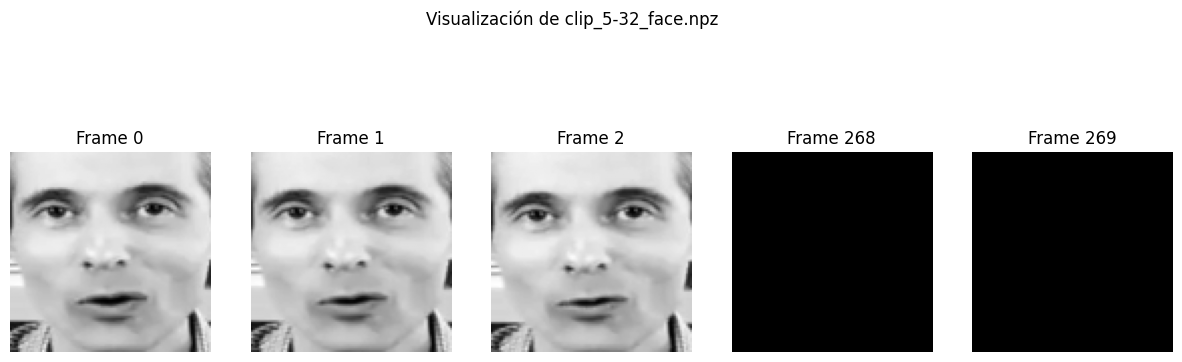

Archivo: clip_5-8_face.npz, Dimensiones: (270, 100, 100)


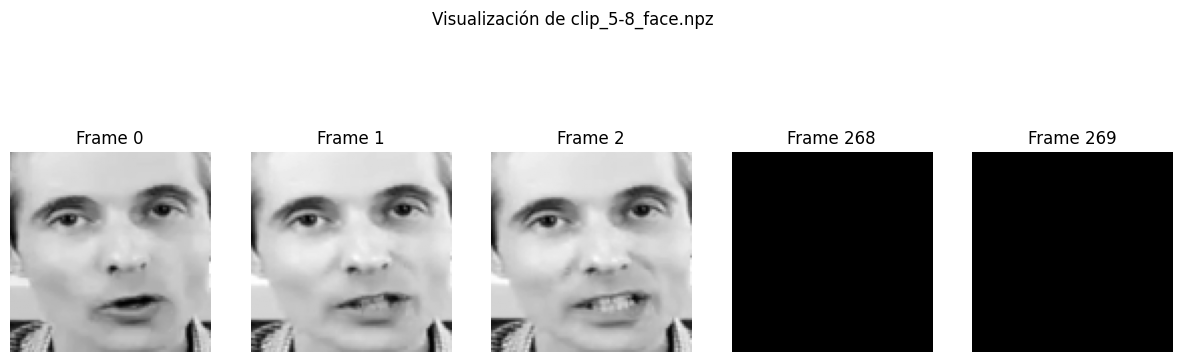

Archivo: clip_5-26_face.npz, Dimensiones: (270, 100, 100)


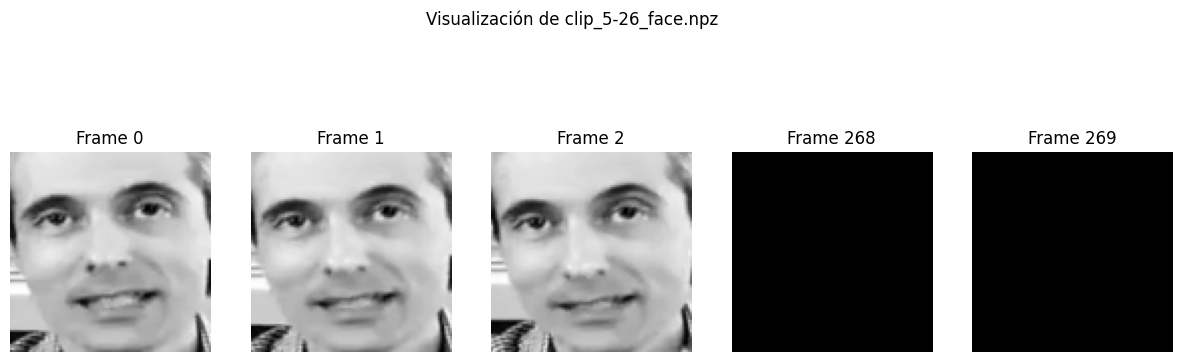

Archivo: clip_5-7_face.npz, Dimensiones: (270, 100, 100)


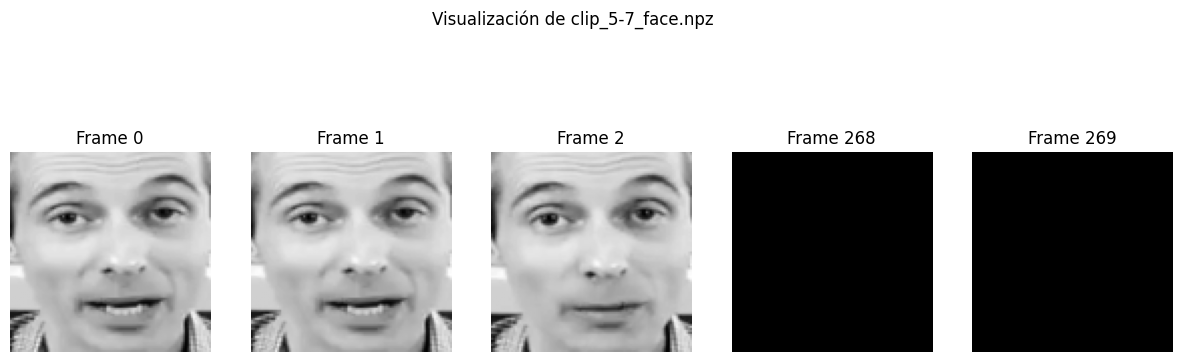

Archivo: clip_5-31_face.npz, Dimensiones: (270, 100, 100)


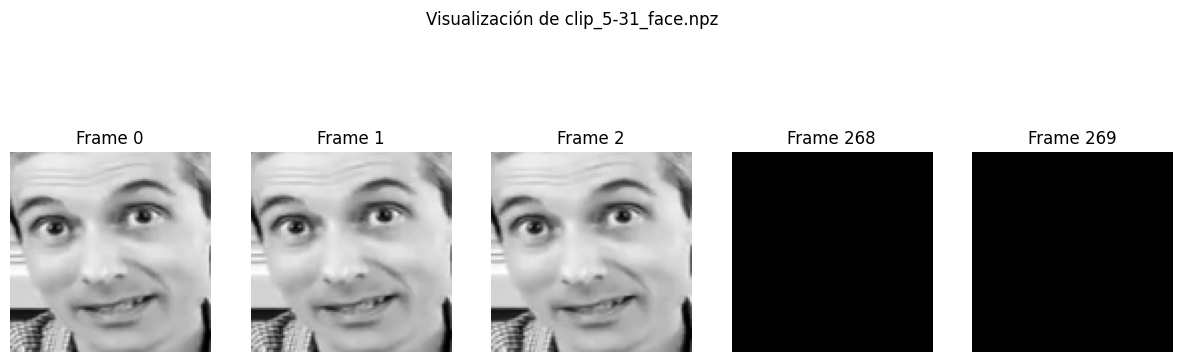

Archivo: clip_4-3_face.npz, Dimensiones: (270, 100, 100)


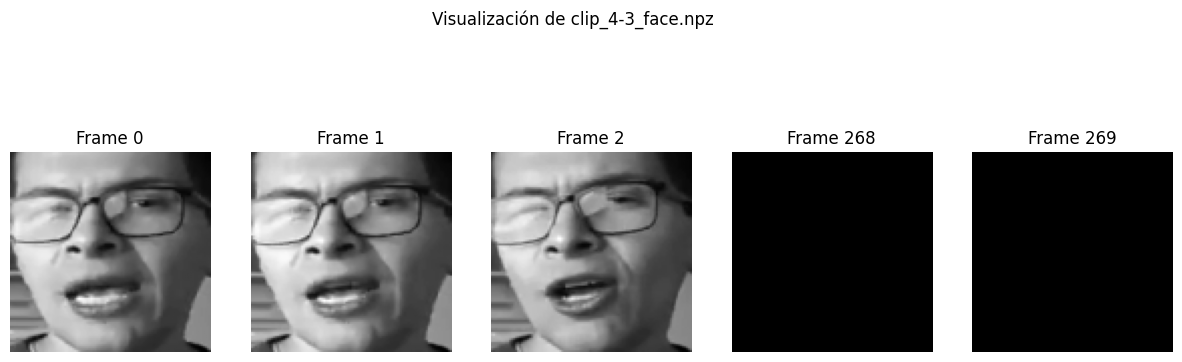

Archivo: clip_5-19_face.npz, Dimensiones: (270, 100, 100)


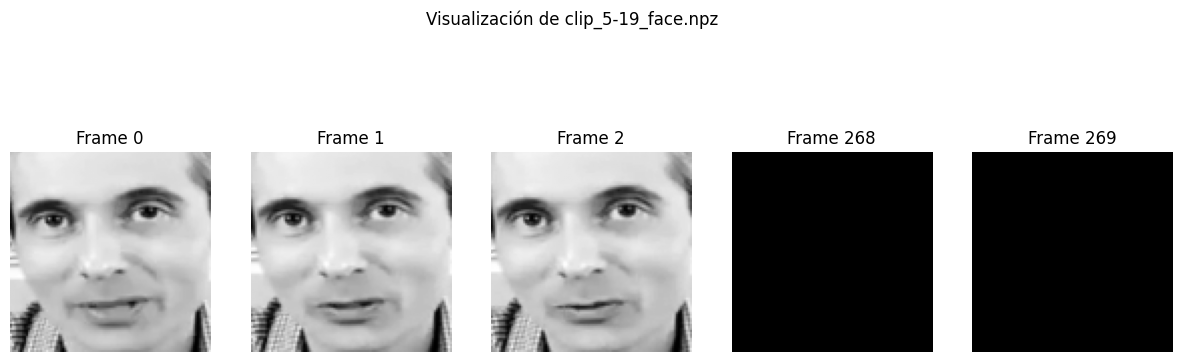

Archivo: clip_4-7_face.npz, Dimensiones: (270, 100, 100)


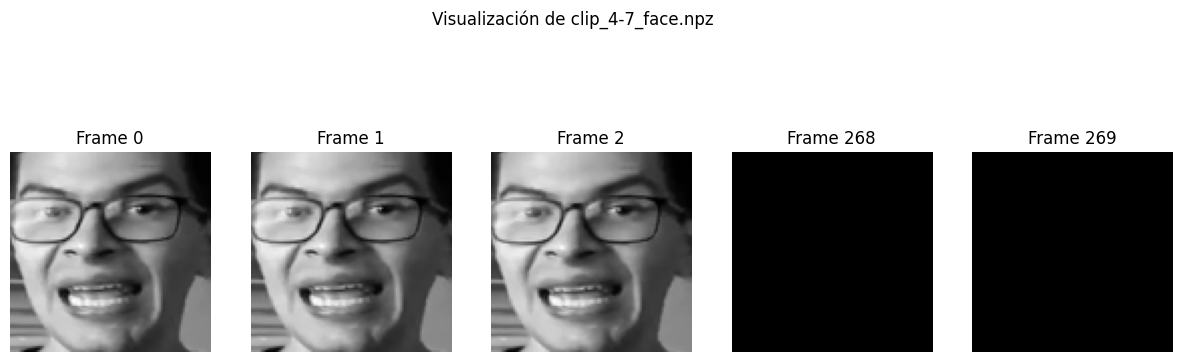

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

folder_path = "DataProcessed/Mouth"

npz_files = [f for f in os.listdir(folder_path) if f.endswith(".npz")]

for file in npz_files:
    file_path = os.path.join(folder_path, file)

    data = np.load(file_path)
    frames = data["mouth_frames"] 

    print(f"Archivo: {file}, Dimensiones: {frames.shape}")

    num_frames = frames.shape[0]
    selected_frames = list(range(3)) + list(range(num_frames - 2, num_frames))

    fig, axes = plt.subplots(1, len(selected_frames), figsize=(15, 5))
    fig.suptitle(f"Visualización de {file}")

    for ax, idx in zip(axes, selected_frames):
        ax.imshow(frames[idx], cmap="gray")
        ax.set_title(f"Frame {idx}")
        ax.axis("off")

    plt.show()


In [4]:
import numpy as np
import os

folder_path = "DataProcessed/Mel"
files = sorted([f for f in os.listdir(folder_path) if f.endswith('.npz')])[:1]  # Solo un archivo para inspección

for file in files:
    data = np.load(os.path.join(folder_path, file))
    print(f"Claves en {file}: {list(data.keys())}")


Claves en audio_4-1_mel.npz: ['mel_spec']


audio_4-1_mel.npz: (80, 256)
audio_4-2_mel.npz: (80, 256)
audio_4-3_mel.npz: (80, 256)
audio_4-4_mel.npz: (80, 256)
audio_4-5_mel.npz: (80, 256)


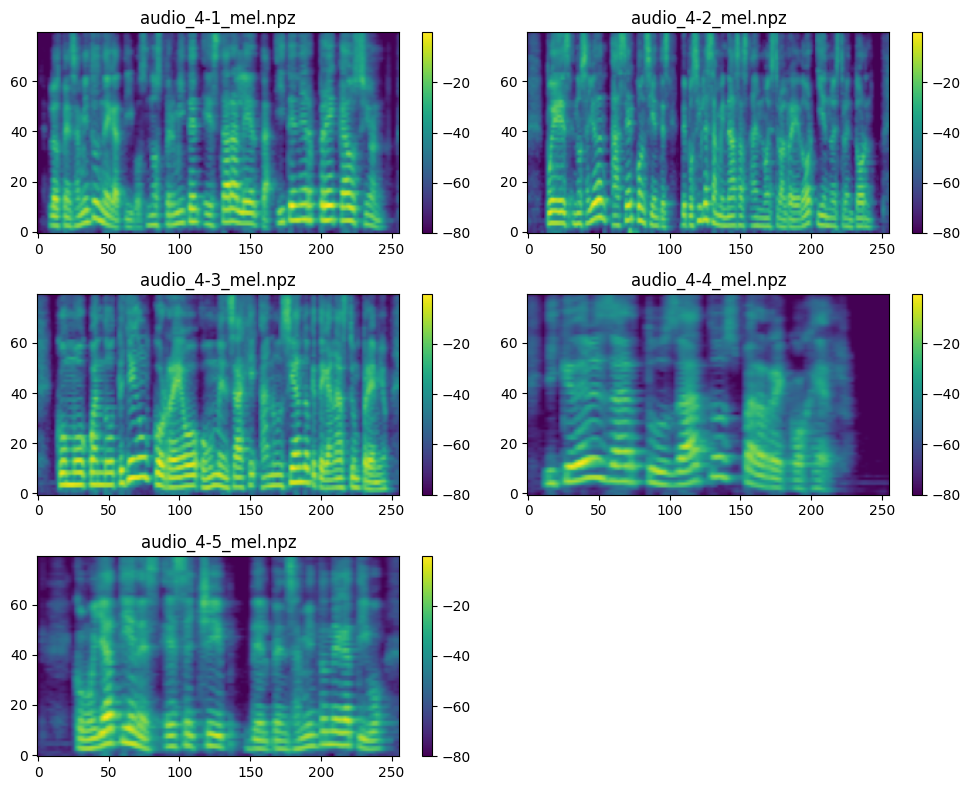

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

folder_path = "DataProcessed/Mel"

files = sorted([f for f in os.listdir(folder_path) if f.endswith('.npz')])[:5]

plt.figure(figsize=(10, 8))

for i, file in enumerate(files):
    data = np.load(os.path.join(folder_path, file))
    mel_spectrogram = data["mel_spec"]  # Cambia "arr_0" si la clave es diferente

    # Mostrar dimensiones
    print(f"{file}: {mel_spectrogram.shape}")

    # Graficar
    plt.subplot(3, 2, i + 1)
    plt.imshow(mel_spectrogram, aspect='auto', origin='lower')
    plt.title(file)
    plt.colorbar()

plt.tight_layout()
plt.show()
